# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.

> **Once you have completed your project, and you are done with coding restart your kernel and run everything. Make sure it runs without errors.**  
    - For this go to the very top where the tabs are located:
        - Kernel  
            - Restart & Run All  
    - We will check whether the code and results in this notebook is running fine.  


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    3. The label predictions as csv file. -> See last question.

Good Luck!

### Shreyas Ravi

**Honor Pledge:**  
I pledge on my honor that I, **Shreyas Ravi**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import sklearn
sklearn.__version__

'0.24.2'

In [5]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [2]:
# Your package imports here
import pandas as pd 

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [6]:
loans = pd.read_csv('loans_train.csv')
loans_outcome_not_known = pd.read_csv('loans_outcome_not_known.csv')

In [7]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,credit_card,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0
1,1,all_other,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0
2,1,debt_consolidation,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0
3,1,debt_consolidation,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1
4,0,debt_consolidation,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0


In [8]:
loans_outcome_not_known.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0
1,0,educational,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0
2,1,debt_consolidation,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0
3,0,major_purchase,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0
4,1,credit_card,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0


**Check out the info(), head(), and describe() methods on loans.**

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


In [10]:
# YOUR CODE
loans.shape

(7478, 14)

In [11]:
# finding the unique values in not.fully.paid = 2 unique
loans['not.fully.paid'].unique()

array([0, 1])

In [13]:
loans['not.fully.paid'].value_counts(normalize=True)
#19% did not fully pay it back

0    0.808371
1    0.191629
Name: not.fully.paid, dtype: float64

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

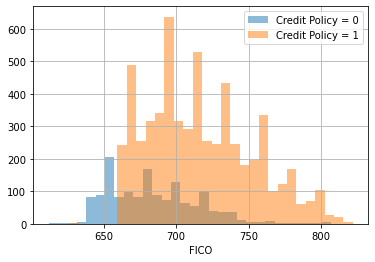

In [30]:
# YOUR CODE
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5, label='Credit Policy = 0', bins=30)
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5, label='Credit Policy = 1', bins=30)
plt.legend()
plt.xlabel('FICO')

**Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

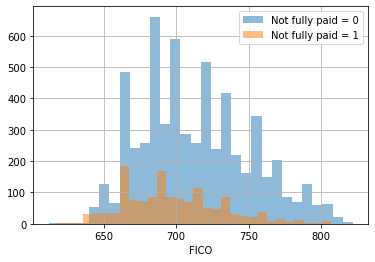

In [31]:
# YOUR CODE
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5, label='Not fully paid = 0', bins=30)
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5, label='Not fully paid = 1', bins=30)
plt.legend()
plt.xlabel('FICO')

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

<AxesSubplot:xlabel='purpose', ylabel='count'>

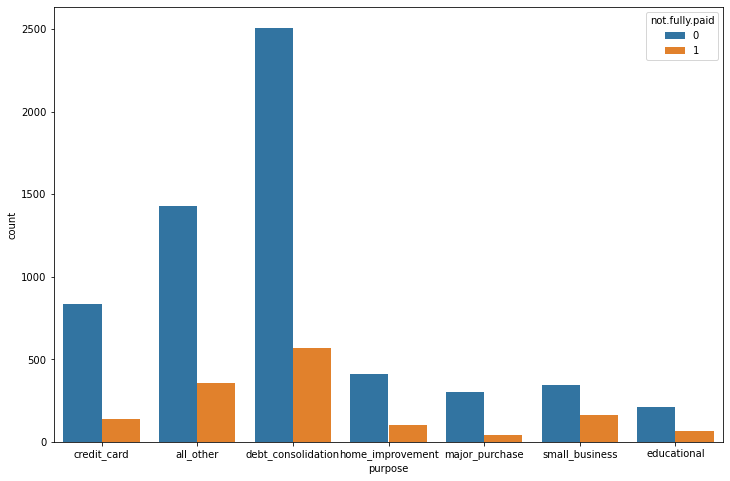

In [48]:
# YOUR CODE
plt.figure(figsize=(12,8))
sns.countplot(x="purpose", data=loans, hue='not.fully.paid')

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

Text(336.9714285714286, 0.5, 'int.rate')

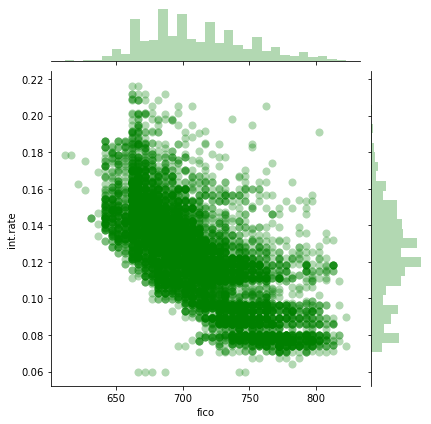

In [322]:
# YOUR CODE
sns.jointplot(data=loans, x="fico", y="int.rate", kind='scatter', color='green', alpha=0.3, joint_kws={'s':65}, linewidth=0,  marginal_kws = dict(bins = 30, fill = True, alpha = 0.3, linewidth = 0))
# sns.color_palette("light:#5A9", as_cmap=True)
plt.xlabel('FICO')
plt.ylabel('int.rate')


**Create the following lmplots to see if the trend differed between `not.fully.paid` and `credit.policy`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

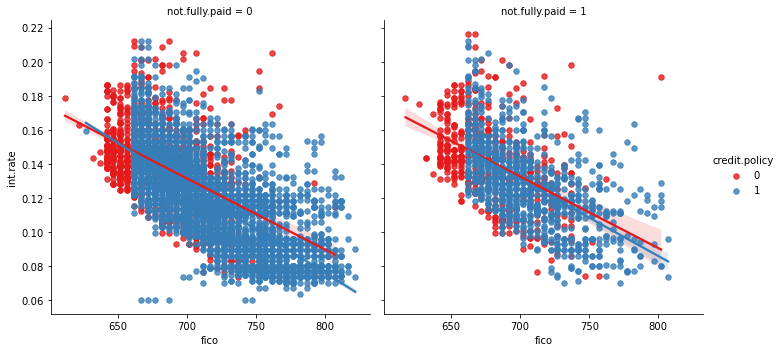

In [92]:
# YOUR CODE
sns.lmplot(x="fico", y="int.rate", col="not.fully.paid", data=loans, hue='credit.policy', palette='Set1', scatter_kws={"s":30})

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**Check loans.info() again.**

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies().

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

> The same transformation needs to be aplied on every dataset. The easiest way would be to merge train and test (loans_outcome_not_known) sets, and to split after the transformation.

In [10]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,credit_card,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0
1,1,all_other,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0
2,1,debt_consolidation,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0
3,1,debt_consolidation,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1
4,0,debt_consolidation,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0


**Now you can use `pd.get_dummies(loans,columns=cat_feats)` to create a fixed larger dataframe that has new feature columns with dummy variables.**

In [111]:
# YOUR CODE
cat_feats = ['purpose']
loans = pd.get_dummies(loans, columns=cat_feats)


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

# Q4

## Decision Tree Model

Let's start by training a single decision tree first!


- Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Plot the decision tree of the best model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [114]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [115]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
613,0,0.1450,172.11,11.401994,16.57,647,5129.958333,21251,80.8,0,0,0,0,0,1,0,0,0,0
5734,1,0.1008,387.66,11.775290,21.20,772,6750.041667,74885,0.0,0,0,0,1,0,0,0,0,0,0
7118,1,0.1253,401.60,10.819778,16.08,712,5430.000000,15244,66.6,0,0,1,0,0,1,0,0,0,0
4418,1,0.0963,288.85,11.608236,18.41,737,3481.041667,2737,6.4,1,0,0,0,1,0,0,0,0,0
2609,1,0.1229,320.19,11.264464,8.80,672,3760.958333,4822,58.1,0,0,1,0,0,1,0,0,0,0


In [177]:
# YOUR CODE
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

In [178]:
dt1_pred_train = dt1.predict(X_train)
accuracy_score(y_train, y_pred=dt1_pred_train)

1.0

In [179]:
dt1_pred = dt1.predict(X_val)
accuracy_score(y_val, y_pred=dt1_pred)

0.714349376114082

The above shows overfitting.

In [180]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, dt1_pred)
print(cm)

[[1492  315]
 [ 326  111]]


In [181]:
from sklearn import metrics
print(metrics.classification_report(y_true = y_val, y_pred = dt1_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1807
           1       0.26      0.25      0.26       437

    accuracy                           0.71      2244
   macro avg       0.54      0.54      0.54      2244
weighted avg       0.71      0.71      0.71      2244



In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
dt = DecisionTreeClassifier(min_samples_split=5)
scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv, n_jobs=1, )
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.69245463 0.70964661 0.72492837 0.72301815 0.73518164]


In [191]:
min_samples_split = [5, 10, 20, 25, 30, 40, 50]

In [192]:
scores_params = []
for m in min_samples_split:
    dt = DecisionTreeClassifier(min_samples_split=m)
    scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params.append(scores.mean())

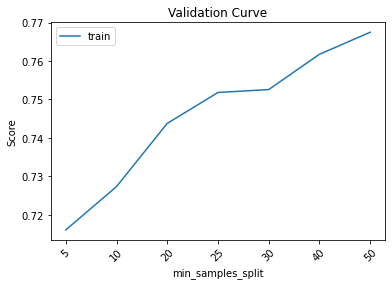

In [194]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(min_samples_split)), min_samples_split, rotation=45)
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [189]:
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
dt1_1 = DecisionTreeClassifier(max_depth=5)
scores1 = cross_val_score(dt1_1, X=X_train, y=y_train, scoring='accuracy', cv=cv, n_jobs=1, )
print('CV accuracy scores: %s' % scores1)

CV accuracy scores: [0.80229226 0.80229226 0.7965616  0.79083095 0.79827916]


In [195]:
max_depth = [5, 10, 20, 25, 30, 40, 50]
scores_params1 = []
for m in max_depth:
    dt1 = DecisionTreeClassifier(max_depth=m)
    scores = cross_val_score(dt1, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params1.append(scores.mean())

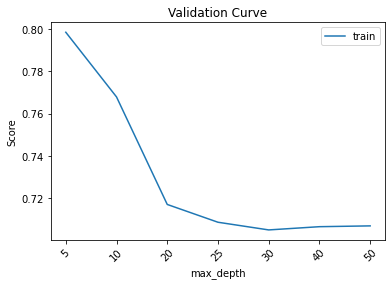

In [324]:
plt.plot(scores_params1, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(max_depth)), max_depth, rotation=45)
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [328]:
from sklearn.model_selection import GridSearchCV
ms_rng = list(range(5, 21))
mx_dpth = list(range(8, 21))
parameters = {'min_samples_split':ms_rng, 'max_depth':mx_dpth}
dt2 = DecisionTreeClassifier()
clf = GridSearchCV(dt2, parameters, cv=5, scoring='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                                       19, 20],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16, 17, 18, 19, 20]},
             scoring='f1')

In [329]:
best_estimator=clf.best_estimator_

In [330]:
best_estimator

DecisionTreeClassifier(max_depth=16, min_samples_split=12)

In [185]:
print(metrics.classification_report(y_true = y_val, y_pred = clf.predict(X_val), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1807
           1       0.27      0.19      0.22       437

    accuracy                           0.74      2244
   macro avg       0.54      0.53      0.53      2244
weighted avg       0.71      0.74      0.72      2244



The above shows an increase in recall from 0.83 to 0.88 for class 0 and a decrease from 0.25 to 0.19 for class 1. Similarly, the precision shows the same value for class 0 and a 0.01 increase in precision for class 1. There is also an increase in accuracy from 0.71 to 0.74.

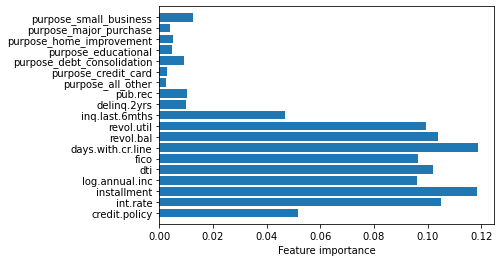

In [204]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

# Q5

## Random Forest model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
RandomForestClassifier()

RandomForestClassifier()

In [209]:
# YOUR CODE
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [211]:
rf_pred_train = rf.predict(X_train)
accuracy_score(y_train, y_pred=rf_pred_train) #training accuracy

1.0

In [212]:
rf_pred_test = rf.predict(X_val)
accuracy_score(y_val, y_pred=rf_pred_test) #testing accuracy

0.8061497326203209

Once again, with a training accuracy of 100% and a testing accuracy of 80.6% we can tell that there is some amount of overfitting here. 

In [213]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_val, rf_pred_test)
print(cm_rf)

[[1791   16]
 [ 419   18]]


In [214]:
print(metrics.classification_report(y_true = y_val, y_pred = rf_pred_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.53      0.04      0.08       437

    accuracy                           0.81      2244
   macro avg       0.67      0.52      0.48      2244
weighted avg       0.76      0.81      0.73      2244



In [215]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
rfc = RandomForestClassifier(min_samples_split=5)
scores = cross_val_score(rfc, X=X_train, y=y_train, scoring='accuracy', cv=cv, n_jobs=1, )
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.80897803 0.79465138 0.80897803 0.79560649 0.80783939]


In [252]:
min_samples_split = [5, 10, 20, 25, 30, 40, 50]
scores_params = []
for m in min_samples_split:
    rfc1 = RandomForestClassifier(min_samples_split=m)
    scores = cross_val_score(rfc1, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params.append(scores.mean())

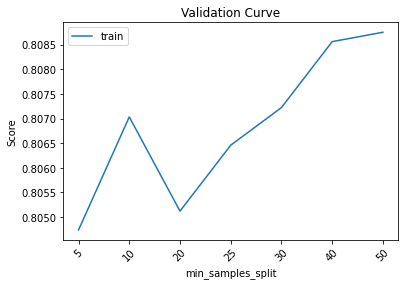

In [236]:
plt.plot(scores_params, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(min_samples_split)), min_samples_split, rotation=45)
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [226]:
max_depth = [5, 10, 20, 25, 30, 40, 50]
scores_params2 = []
for m in max_depth:
    rfc2 = RandomForestClassifier(max_depth=m)
    scores = cross_val_score(rfc2, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params2.append(scores.mean())

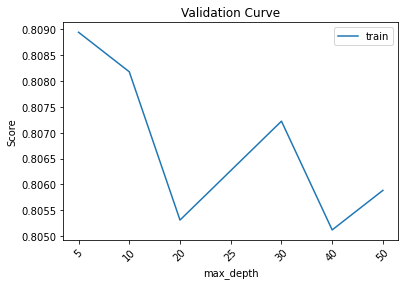

In [227]:
plt.plot(scores_params2, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(max_depth)), max_depth, rotation=45)
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [228]:
n_estimators = [5, 10, 20, 25, 30, 40, 50]
scores_params3 = []
for m in n_estimators:
    rfc3 = RandomForestClassifier(n_estimators=m)
    scores = cross_val_score(rfc3, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params3.append(scores.mean())

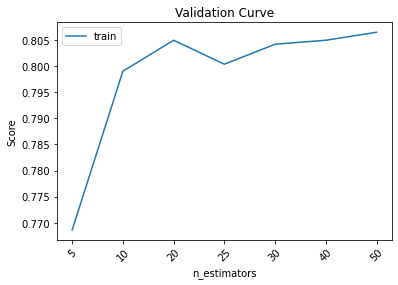

In [229]:
plt.plot(scores_params3, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [368]:
#from sklearn.model_selection import GridSearchCV
ms_rng = list(range(2, 12, 2))
mx_dpth = [1, 2, 3, 'None']
n_estm = list(range(50, 100, 10))
parameters = {'min_samples_split':ms_rng, 'max_depth':mx_dpth, 'n_estimators':n_estm}
rfc_gscv = RandomForestClassifier()
rf_gs = GridSearchCV(rfc_gscv, parameters, cv=5, scoring='f1')
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 'None'],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 60, 70, 80, 90]},
             scoring='f1')

In [369]:
best_estimator_rf=rf_gs.best_estimator_

In [370]:
best_estimator_rf

RandomForestClassifier(max_depth=1, n_estimators=50)

In [237]:
print(metrics.classification_report(y_true = y_val, y_pred = clf_rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1807
           1       0.37      0.11      0.17       437

    accuracy                           0.79      2244
   macro avg       0.59      0.53      0.53      2244
weighted avg       0.73      0.79      0.74      2244



When we compare the above precision, recall and f-1 score to the previous one for the random forest classifier we see small changes such as precision increasing from 0.81 to 0.82 for class 0 and precision falling quite a bit from 0.53 to 0.37 in class 1. Furthermore we also see a fall in the accuracy from 0.81 to 0.79, a fall in class 0 recall from 0.99 to 0.95 and a fall in class 0 f-1 score from 0.89 to 0.88.

# Q6

## Adaboost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [239]:
from sklearn.ensemble import AdaBoostClassifier

In [240]:
AdaBoostClassifier()

AdaBoostClassifier()

In [241]:
# YOUR CODE
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

AdaBoostClassifier()

In [245]:
abc_pred_train = abc.predict(X_train)
accuracy_score(y_train, y_pred=abc_pred_train) #training accuracy

0.815246465418418

In [246]:
abc_pred_test = abc.predict(X_val)
accuracy_score(y_val, y_pred=abc_pred_test) #testing accuracy

0.803475935828877

Here we can see that the training accuracy is not much higher than the testing accuracy. This means that the model is relatively better than the previous ones. We can also see that comparatively, there is little to no overfitting occuring here as well unlike previous models where training accuracies were at 100% and testing accuracies were much lower.

In [247]:
cm_abc = confusion_matrix(y_val, abc_pred_test)
print(cm_abc)

[[1786   21]
 [ 420   17]]


In [248]:
print(metrics.classification_report(y_true = y_val, y_pred = abc_pred_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.45      0.04      0.07       437

    accuracy                           0.80      2244
   macro avg       0.63      0.51      0.48      2244
weighted avg       0.74      0.80      0.73      2244



In [264]:
learning_rate = [2, 4, 6, 8, 10, 12, 14, 16]
scores_params_abc = []
for m in learning_rate:
    abc1 = AdaBoostClassifier(learning_rate=m)
    scores = cross_val_score(abc1, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params_abc.append(scores.mean())

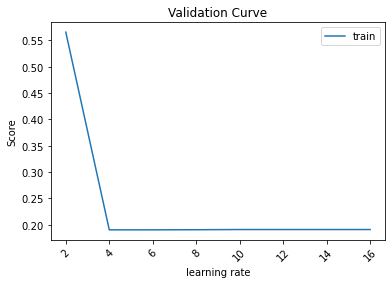

In [265]:
plt.plot(scores_params_abc, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(learning_rate)), learning_rate, rotation=45)
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [284]:
n_estimators = [50, 60, 70, 80, 90, 100]
scores_params_abc1 = []
for m in n_estimators:
    abc2 = AdaBoostClassifier(n_estimators=m)
    scores = cross_val_score(abc2, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params_abc1.append(scores.mean())

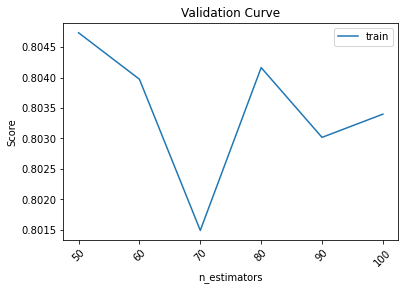

In [285]:
plt.plot(scores_params_abc1, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(n_estimators)), n_estimators, rotation=45)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [360]:
lrn_rte = list(range(1, 17, 2))
n_estm1 = list(range(50, 101, 10))
parameters = {'learning_rate':lrn_rte, 'n_estimators':n_estm1}
abc_gscv = AdaBoostClassifier()
abc_gs = GridSearchCV(abc_gscv, parameters, cv=5, scoring='recall')
abc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1, 3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='recall')

In [364]:
abc_pred1 = abc_gs.predict(X_val)

In [365]:
best_estimator=clf1.best_estimator_

In [366]:
print(best_estimator)

AdaBoostClassifier(learning_rate=5)


In [351]:
print(metrics.classification_report(y_true = y_val, y_pred = clf1.predict(X_val)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1807
           1       0.19      1.00      0.33       437

    accuracy                           0.19      2244
   macro avg       0.10      0.50      0.16      2244
weighted avg       0.04      0.19      0.06      2244



# Q7

## Gradient Boost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [276]:
from sklearn.ensemble import GradientBoostingClassifier

In [277]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [278]:
# YOUR CODE
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [279]:
gbc_pred_train = gbc.predict(X_train)
accuracy_score(y_train, y_pred=gbc_pred_train) #training accuracy

0.8291937332823844

In [280]:
gbc_pred_test = gbc.predict(X_val)
accuracy_score(y_val, y_pred=gbc_pred_test) #testing accuracy

0.8057040998217468

Similar to the outcome of the testing and training accuracies with the Ada Boost model, we see a training accuracy of 82% and testing accuracy of about 80% which do not have a very large gap between them. This means that there is little to no overfitting and the model is relatively good, in that it is able to perform with similar accuracy with the training data and testing data.

In [281]:
cm_gbc = confusion_matrix(y_val, gbc_pred_test)
print(cm_gbc)

[[1791   16]
 [ 420   17]]


In [282]:
print(metrics.classification_report(y_true = y_val, y_pred = gbc_pred_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.52      0.04      0.07       437

    accuracy                           0.81      2244
   macro avg       0.66      0.52      0.48      2244
weighted avg       0.75      0.81      0.73      2244



In [287]:
learning_rate1 = [2, 4, 6, 8, 10, 12, 14, 16]
scores_params_gbc = []
for m in learning_rate1:
    gbc1 = GradientBoostingClassifier(learning_rate=m)
    scores = cross_val_score(gbc1, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params_gbc.append(scores.mean())

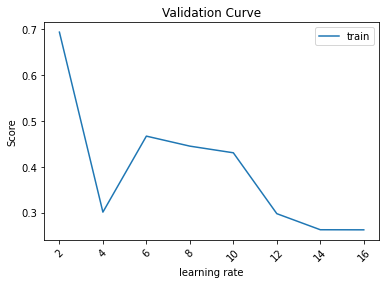

In [288]:
plt.plot(scores_params_gbc, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(learning_rate1)), learning_rate1, rotation=45)
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [289]:
n_estimators1 = [50, 60, 70, 80, 90, 100]
scores_params_gbc1 = []
for m in n_estimators1:
    gbc2 = GradientBoostingClassifier(n_estimators=m)
    scores = cross_val_score(gbc2, X=X_train, y=y_train, scoring='accuracy', cv=cv)
#     print(scores)
    scores_params_gbc1.append(scores.mean())

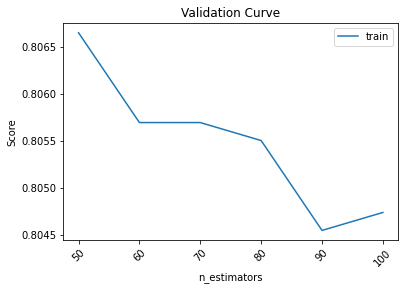

In [290]:
plt.plot(scores_params_gbc1, label = 'train')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(n_estimators1)), n_estimators1, rotation=45)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [295]:
lrn_rte1 = list(range(1, 12, 2))
n_estm2 = list(range(50, 101, 10))
parameters_gbc = {'learning_rate':lrn_rte1, 'n_estimators':n_estm2}
gbc_gscv = GradientBoostingClassifier()
gbc_gs = GridSearchCV(gbc_gscv, parameters_gbc, cv=5, scoring='f1')
gbc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1, 3, 5, 7, 9, 11],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='f1')

In [296]:
gbc_gs_pred1 = gbc_gs.predict(X_val)

In [353]:
best_estimators_gbc=gbc_gs.best_estimator_

In [354]:
best_estimators_gbc

GradientBoostingClassifier(learning_rate=3, n_estimators=50)

In [297]:
print(metrics.classification_report(y_true = y_val, y_pred = gbc_gs_pred1))

              precision    recall  f1-score   support

           0       0.94      0.19      0.32      1807
           1       0.22      0.95      0.36       437

    accuracy                           0.34      2244
   macro avg       0.58      0.57      0.34      2244
weighted avg       0.80      0.34      0.33      2244



The above shows a large decrease in the accuracy after tuning the n_estimators and learning_rate parameters. Initially we had an accuracy of 0.81 beforehand and after the entire cross validation and hyperparameter tuning process we got an accuracy of 0.34, showing that this did not help the accuracy of the model. Furthermore, we see large changes in recall and precision as well after this process, large falls in precision and accuracy also support what I mentioned earlier. The tuning of hyperparameters did not help any of these metrics in this case. 

# Q8

- Using the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model recall increasing? Why do you think this might have helped?
    - If both of them did not improve, comment on why this might have been the case.
    - Optional: Apply different things and see if the recall is improving

In [308]:
# YOUR CODE
# tuning hyperparameters is a good place to start especially for classifiers such as Decision Trees
dt_gini = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=None)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [309]:
dt_gini_pred=dt_gini.predict(X_train)
accuracy_score(y_train, y_pred=dt_gini_pred) #training accuracy

1.0

Here we can already see a good chance of overfitting since the training accuracy seems to be 100%

In [310]:
dt_gini_pred1=dt_gini.predict(X_val)
accuracy_score(y_val, y_pred=dt_gini_pred1) #tesing accuracy

0.7040998217468806

The testing accuracy is about 30% lower than the training accuracy which means there is a lot of overfitting in this model. Next, we will try the same classifier with 'entropy' as the criterion.

In [311]:
# criterion = entropy
dt_ent = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=None)
dt_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [312]:
dt_ent_pred=dt_ent.predict(X_train)
accuracy_score(y_train, y_pred=dt_ent_pred) #training accuracy

1.0

Once again, a very high training accuracy which means there will be overfitting

In [313]:
dt_ent_pred1=dt_ent.predict(X_val)
accuracy_score(y_val, y_pred=dt_ent_pred1) #testing accuracy

0.7094474153297683

Despite there being overfitting with both models, we see a slight increase in accuracy for the testing set between the model with gini criterion and the model with entropy criterion. Another way to test for an increase in accuracy would be to try the same classifier with default splitter vs splitter=random.

In [315]:
dt_rand = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=None, splitter='random')
dt_rand.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')

In [316]:
dt_rand_pred=dt_rand.predict(X_train)
accuracy_score(y_train, y_pred=dt_rand_pred) #training accuracy

1.0

Once again, overfitting

In [317]:
dt_rand_pred1=dt_rand.predict(X_val)
accuracy_score(y_val, y_pred=dt_rand_pred1) #testing accuracy

0.6987522281639929

Now we will try the default splitter value

In [319]:
dt_best = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=None, splitter='best')
dt_best.fit(X_train, y_train)

DecisionTreeClassifier()

In [320]:
dt_best_pred=dt_best.predict(X_train)
accuracy_score(y_train, y_pred=dt_best_pred) #training accuracy

1.0

In [321]:
dt_best_pred1=dt_best.predict(X_val)
accuracy_score(y_val, y_pred=dt_best_pred1) #testing accuracy

0.7112299465240641

The default splitter value seems to provide a higher testing accuracy of 0.71 as opposed to the random splitter value which provided an accuracy of 0.69. Therefore, the default splitter value increases the accuracy of the DT model compared to the former. 

# Q9

- Choose the best fitted model for each of teh classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the test set:
    - Create confusion matrix for each model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
        - Recall (Sensitivity)
        - Specificity
        - Precision
        - Balanced Accuracy
        - F1 Score

In [333]:
# YOUR CODE
# decision tree
dt_final = DecisionTreeClassifier(max_depth=16, min_samples_split=12)
dt_final.fit(X_val, y_val)

DecisionTreeClassifier(max_depth=16, min_samples_split=12)

In [334]:
dt_final_pred = dt_final.predict(X_val)

In [361]:
cm_dt_final = confusion_matrix(y_val, dt_final_pred)
print(cm_dt_final)

[[1764   43]
 [ 190  247]]


In [335]:
accuracy_score(y_val, y_pred=dt_final_pred) #accuracy

0.8961675579322638

In [336]:
print(metrics.classification_report(y_true = y_val, y_pred = dt_final_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1807
           1       0.85      0.57      0.68       437

    accuracy                           0.90      2244
   macro avg       0.88      0.77      0.81      2244
weighted avg       0.89      0.90      0.89      2244



In [344]:
# adaboost
abc_final = AdaBoostClassifier(learning_rate=5)
abc_final.fit(X_val, y_val)


AdaBoostClassifier(learning_rate=5)

In [345]:
abc_final_pred = abc_final.predict(X_val)

In [362]:
cm_abc_final = confusion_matrix(y_val, abc_final_pred)
print(cm_abc_final)

[[   0 1807]
 [   0  437]]


In [346]:
accuracy_score(y_val, y_pred=abc_final_pred) #very low accuracy despite being fit on the testing set - underfitting

0.1947415329768271

In [349]:
import warnings
warnings.filterwarnings('ignore')

In [350]:
print(metrics.classification_report(y_true = y_val, y_pred = abc_final_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1807
           1       0.19      1.00      0.33       437

    accuracy                           0.19      2244
   macro avg       0.10      0.50      0.16      2244
weighted avg       0.04      0.19      0.06      2244



In [355]:
# gradient boost
gbc_final=GradientBoostingClassifier(learning_rate=3, n_estimators=50)
gbc_final.fit(X_val, y_val)

GradientBoostingClassifier(learning_rate=3, n_estimators=50)

In [357]:
gbc_final_pred = gbc_final.predict(X_val)

In [363]:
cm_gbc_final = confusion_matrix(y_val, gbc_final_pred)
print(cm_gbc_final)

[[  46 1761]
 [  24  413]]


In [358]:
accuracy_score(y_val, y_pred=gbc_final_pred) #very low accuracy despite being fit on the testing set - underfitting

0.20454545454545456

In [359]:
print(metrics.classification_report(y_true = y_val, y_pred = gbc_final_pred))
# very low recall, precision and accuracy scores displayed here as well. 

              precision    recall  f1-score   support

           0       0.66      0.03      0.05      1807
           1       0.19      0.95      0.32       437

    accuracy                           0.20      2244
   macro avg       0.42      0.49      0.18      2244
weighted avg       0.57      0.20      0.10      2244



In [371]:
# random forest
rf_final = RandomForestClassifier(max_depth=1, n_estimators=50)
rf_final.fit(X_val, y_val)

RandomForestClassifier(max_depth=1, n_estimators=50)

In [372]:
rf_final_pred = rf_final.predict(X_val)

In [373]:
cm_rf_final = confusion_matrix(y_val, rf_final_pred)
print(cm_rf_final)

[[1807    0]
 [ 437    0]]


In [374]:
print(metrics.classification_report(y_true = y_val, y_pred = rf_final_pred))
#decent accuracy rate

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1807
           1       0.00      0.00      0.00       437

    accuracy                           0.81      2244
   macro avg       0.40      0.50      0.45      2244
weighted avg       0.65      0.81      0.72      2244



# Q10

- Choose a winner model.
- Make predictions on the hold-out set whose outcome variables are not known (data we imported as: `loans_outcome_not_known`).
- Write the code below to make predictions with this model. At the end it should output the prediction of the labels.
- Save the predictions in a csv file
- There should be a single column in the csv file.
- The column header should be 'predictions'
- Your prediction performance will be calculated and a ranking will be performed 

In [ ]:
# YOUR CODE

# Great Job!